# Pronosoft Football Data - Viz

---

---

# Import Lib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

import warnings
warnings.filterwarnings('ignore')

---

# Paths

In [2]:
path_pronosoft_data = '..\Data\pronosoft_data.csv'
path_pronosoft_data_extended = '..\Data\pronosoft_data_extended.csv'

folder_figure = '..\Figures'

---

# Functions

In [3]:
# Accuracy of Percentage Predictions

def get_acc_of_perc():
    win_perc = np.zeros(100)
    team_1_win_perc = np.zeros(100)
    nul_win_perc = np.zeros(100)
    team_2_win_perc = np.zeros(100)

    total_perc = np.zeros(100)
    team_1_total_perc = np.zeros(100)
    nul_total_perc = np.zeros(100)
    team_2_total_perc = np.zeros(100)

    for idx in range(num_matches):
        team_1_prob = int(100*df['team_1_prob'][idx])
        nul_prob = int(100*df['nul_prob'][idx])
        team_2_prob = int(100*df['team_2_prob'][idx])
        match_prob = {'1': team_1_prob, 'N': nul_prob, '2': team_2_prob}

        match_outcome = df['match_outcome'][idx]

        # Update win_perc & total_perc
        win_perc[match_prob[match_outcome]] += 1
        total_perc[match_prob['1']] += 1
        total_perc[match_prob['2']] += 1
        total_perc[match_prob['N']] += 1

        if match_outcome == '1':
            team_1_win_perc[match_prob[match_outcome]] += 1

        elif match_outcome == 'N':
            nul_win_perc[match_prob[match_outcome]] += 1

        elif match_outcome == '2':
            team_2_win_perc[match_prob[match_outcome]] += 1

        team_1_total_perc[match_prob['1']] += 1
        nul_total_perc[match_prob['N']] += 1
        team_2_total_perc[match_prob['2']] += 1


    # Accuracy for Team 1, nul, Team 2 percentages & total
    team_1_perc_of_win_perc = np.nan_to_num(team_1_win_perc/team_1_total_perc)
    nul_perc_of_win_perc = np.nan_to_num(nul_win_perc/nul_total_perc)
    team_2_perc_of_win_perc = np.nan_to_num(team_2_win_perc/team_2_total_perc)
    perc_of_win_perc = np.nan_to_num(win_perc/total_perc)
        
    return team_1_perc_of_win_perc, nul_perc_of_win_perc, team_2_perc_of_win_perc, perc_of_win_perc

---

---

# Import CSV to Dataframe

In [4]:
df = pd.read_csv(path_pronosoft_data_extended)
df.head()

date                       league   time  team_1_name  \
0  01-10-2018             France - Ligue 2  20:45       Troyes   
1  01-10-2018     Espagne - Liga Espagnole  21:00   Celta Vigo   
2  01-10-2018  Angleterre - Premier League  21:00  Bournemouth   
3  01-10-2018             Italie - Serie A  20:30    Sampdoria   
4  01-10-2018     Portugal - Primeira Liga  21:15         Aves   

      team_2_name  team_1_prob  team_1_bet_odds  team_1_ev  nul_prob  \
0         Auxerre         0.39             2.75       0.07      0.18   
1          Getafe         0.33             2.15      -0.29      0.38   
2  Crystal Palace         0.39             2.20      -0.14      0.25   
3            Spal         0.41             1.72      -0.29      0.25   
4    Portimonense         0.40             2.60       0.04      0.30   

   nul_bet_odds  ...  under_bet_odds  under_ev  over_prob  over_bet_odds  \
0          3.10  ...            1.46     -0.01       0.32           2.00   
1          3.20  ...            1.53     -0.22       0.49           1.88   
2          3.40  ...            1.85     -0.26       0.60           1.65   
3          3.50  ...            1.67     -0.05       0.43           1.85   
4          3.25  ...            1.66      0.15       0.31           1.73   

  over_ev  prediction_uo_pronosoft  prediction_uo_pronosoft_outcome  \
0   -0.36                        U                              1.0   
1   -0.08                      NaN                              NaN   
2   -0.01                        O                              1.0   
3   -0.20                      NaN                              NaN   
4   -0.46                        U                              0.0   

   team_1_score  team_2_score  match_outcome  
0             1             0              1  
1             1             1              N  
2             2             1              1  
3             2             1              1  
4             3             0              1  

[5 rows x 27 columns]

---

---

# Analysis

In [5]:
num_matches = len(df)
print(f'Num. of matches: {num_matches}')

Num. of matches: 52255


In [6]:
# Analysing Pronosoft Prognosis / Predictions 

predictions_team = np.array(df['prediction_team_pronosoft_outcome']) 
predictions_team = [x for x in predictions_team if pd.isna(x) == False]
predictions_uo = np.array(df['prediction_uo_pronosoft_outcome']) 
predictions_uo = [x for x in predictions_uo if pd.isna(x) == False]

num_predictions_team = len(predictions_team)
accuracy_predictions_team = np.round(100 * np.mean(predictions_team), 2)
num_predictions_uo = len(predictions_uo)
accuracy_predictions_uo = np.round(100 * np.mean(predictions_uo), 2)

print('\nPronosoft Predictions Team Win & Under/Over 2.5 score\n') 
print('   Num. Team  ', num_predictions_team)
print('   Acc. Team  ', accuracy_predictions_team, '%\n')
print('   Num. U/O   ', num_predictions_uo)
print('   Acc. U/O   ', accuracy_predictions_uo, '%\n')


Pronosoft Predictions Team Win & Under/Over 2.5 score

   Num. Team   26021
   Acc. Team   56.66 %

   Num. U/O    29970
   Acc. U/O    55.71 %



---

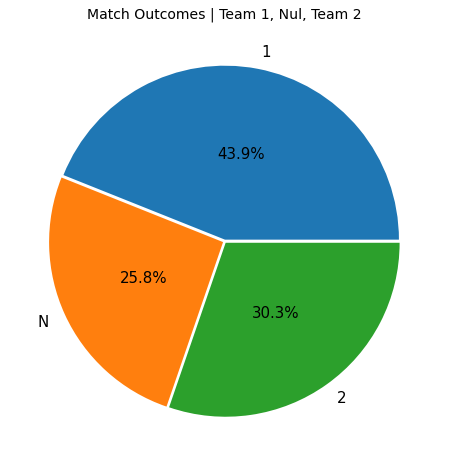

In [8]:
# PIE CHART | Type of matches

match_outcome = list(df['match_outcome'])

count_1 = match_outcome.count('1')
count_N = match_outcome.count('N') 
count_2 = match_outcome.count('2') 


pie, ax = plt.subplots(figsize = (10, 8))

y = np.array([count_1, count_N, count_2])
labels = ['1', 'N', '2']

plt.pie(x = y, autopct = "%.1f%%", explode = len(y) * [0.01], labels = labels, pctdistance = 0.5, textprops = {'fontsize': 15})
plt.title('Match Outcomes | Team 1, Nul, Team 2', fontsize = 14)
pie.savefig(folder_figure + '\Proportion of Outcomes.png')
plt.show()

---

In [9]:
team_1_acc_perc, nul_acc_perc, team_2_acc_perc, acc_perc = get_acc_of_perc()

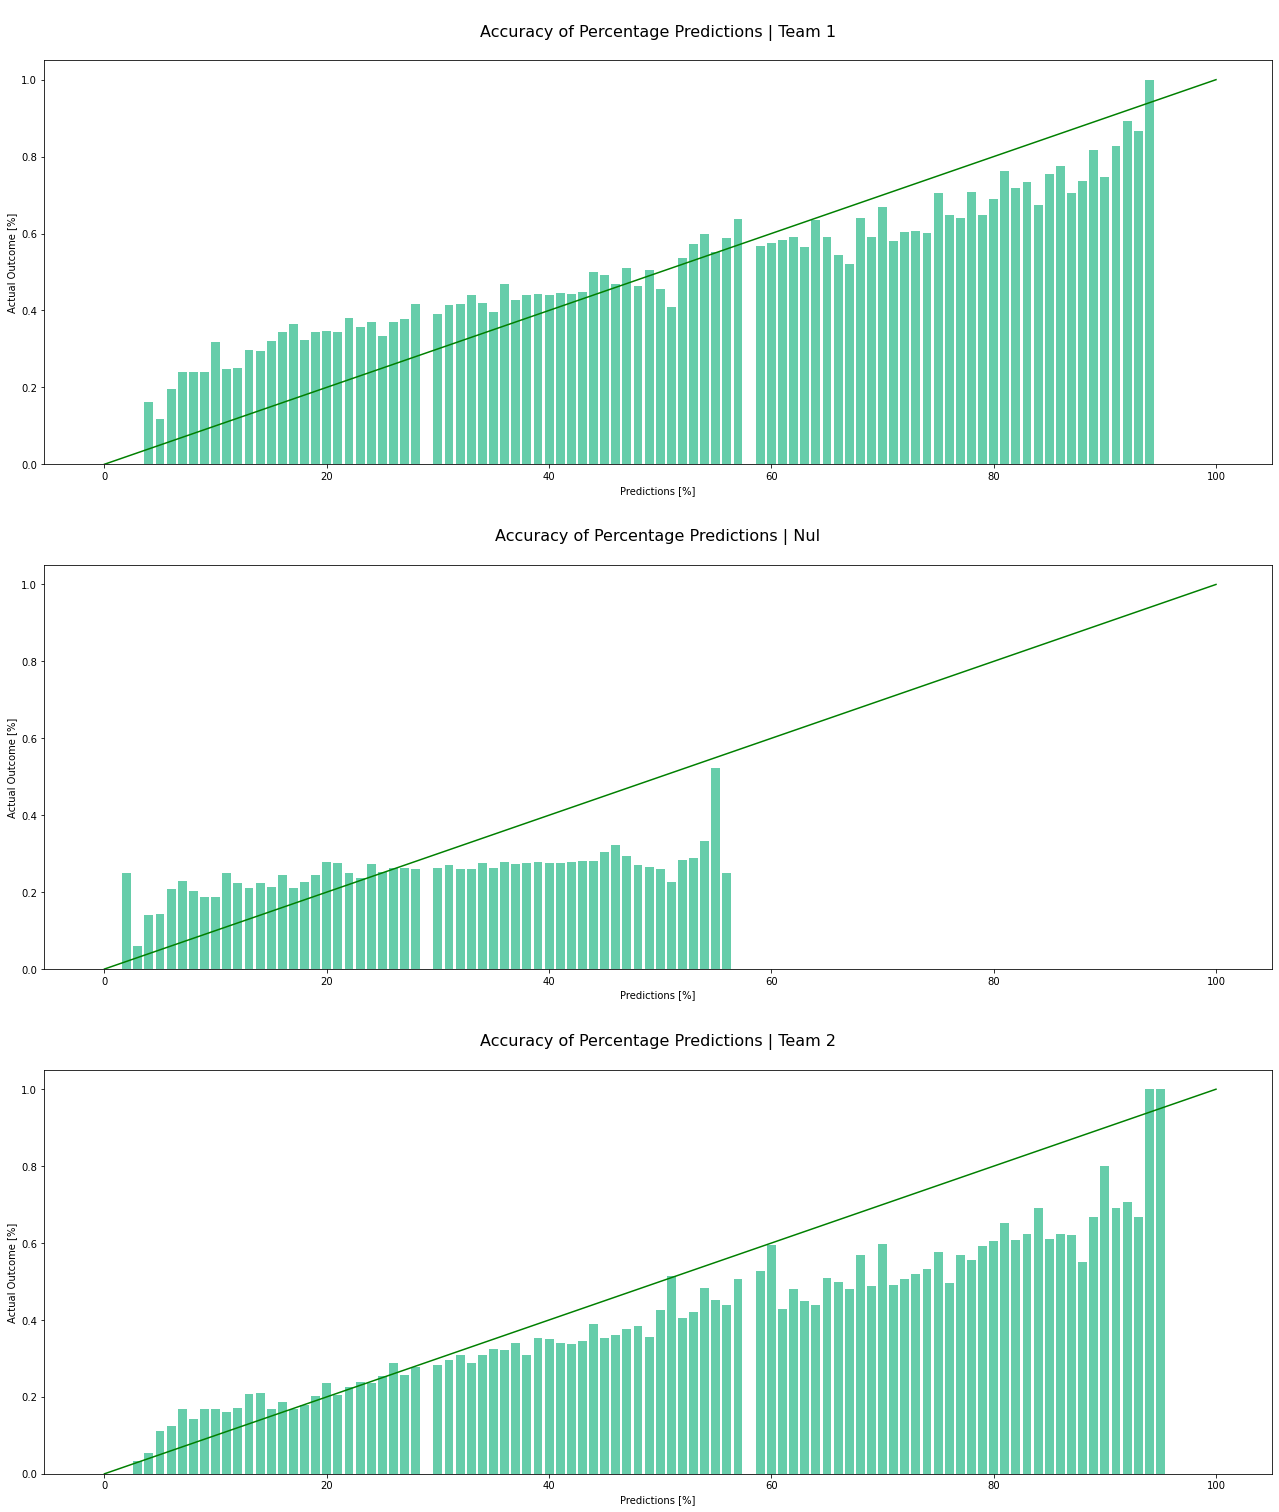

In [20]:
# Accuracy of Percentage Predictions | All 3 outcomes: Team 1, nul, Team 2

perc = range(100)    
fontsize = 16

fig, axs = plt.subplots(3, 1, figsize = (22, 26))
axs[0].bar(perc, team_1_acc_perc, color = 'mediumaquamarine')
axs[0].plot([0, 100], [0, 1], color = 'g')
axs[0].set_title('\nAccuracy of Percentage Predictions | Team 1\n', fontsize = fontsize)
axs[0].set_xlabel('Predictions [%]')
axs[0].set_ylabel('Actual Outcome [%]')

axs[1].bar(perc, nul_acc_perc, color = 'mediumaquamarine')
axs[1].plot([0, 100], [0, 1], color = 'g')
axs[1].set_title('\nAccuracy of Percentage Predictions | Nul\n', fontsize = fontsize)
axs[1].set_xlabel('Predictions [%]')
axs[1].set_ylabel('Actual Outcome [%]')

axs[2].bar(perc, team_2_acc_perc, color = 'mediumaquamarine')
axs[2].plot([0, 100], [0, 1], color = 'g')
axs[2].set_title('\nAccuracy of Percentage Predictions | Team 2\n', fontsize = fontsize)
axs[2].set_xlabel('Predictions [%]')
axs[2].set_ylabel('Actual Outcome [%]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.25)

plt.savefig(folder_figure + '\Accuracy of Percentage Predictions - Team 1, Nul, Team 2.png')
plt.show()

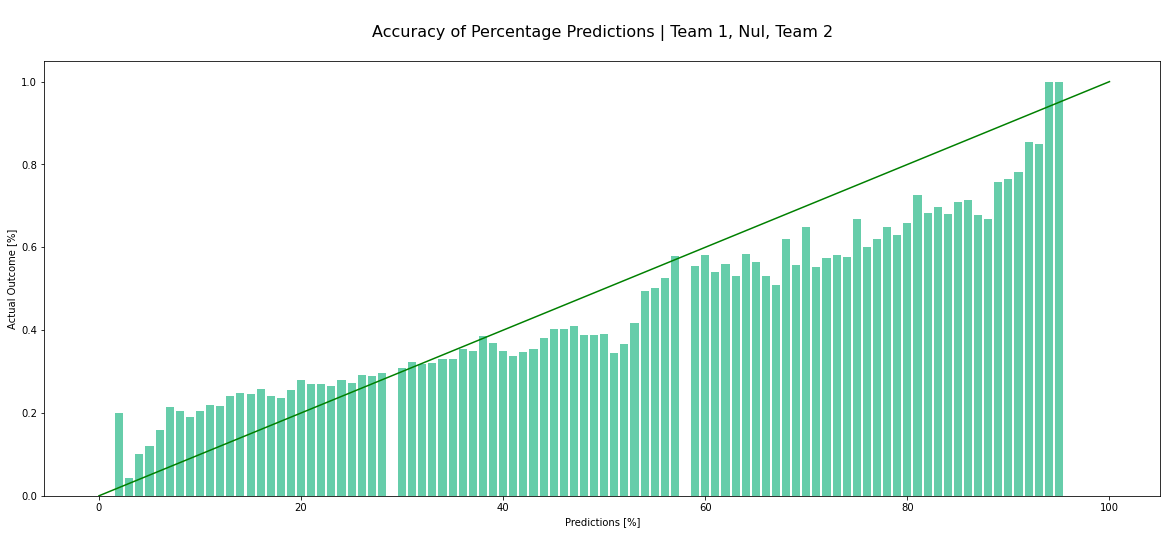

In [21]:
# Accuracy of Percentage Predictions | Total for all 3 outcomes: Team 1, nul, Team 2

perc = range(100)    

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(perc, acc_perc, color = 'mediumaquamarine')
ax.plot([0, 100], [0, 1], color = 'g')
ax.set_title('\nAccuracy of Percentage Predictions | Team 1, Nul, Team 2\n', fontsize = fontsize)
ax.set_xlabel('Predictions [%]')
ax.set_ylabel('Actual Outcome [%]')

plt.savefig(folder_figure + '\Accuracy of Percentage Predictions.png')
plt.show()

---

---